In [120]:
import pandas as pd
import category_encoders as ce

In [121]:
hotels = pd.read_csv('C:\Data\EDA\hotels.csv')
data = hotels.copy()

Страна и город

In [122]:
def get_country(arg):
    country_list= arg.split(' ')
    country_name = country_list[-1]
    if country_name == 'Kingdom':
       return 'United Kingdom'
    else: return country_name
data['country'] = data['hotel_address'].apply(get_country)
data['country'].value_counts()

United Kingdom    196774
Spain              45132
France             44830
Netherlands        43006
Austria            29178
Italy              27883
Name: country, dtype: int64

In [123]:
def get_city(city):
    city_list= city.split(' ')
    city_name = city_list[-2]
    if  city_name=='United':
        return city_list[-5]
    else: return city_name
data['city'] = data['hotel_address'].apply(get_city)
data['city'].value_counts()

London       196774
Barcelona     45132
Paris         44830
Amsterdam     43006
Vienna        29178
Milan         27883
Name: city, dtype: int64

In [124]:
data['country_city']= data['country'] +'-'+ data['city']

In [125]:
encoder = ce.OneHotEncoder(cols=['country_city']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data['country_city'])
data = pd.concat([data, type_bin], axis=1)

Координаты

In [126]:
data_lat_lng = data.copy()
city = data_lat_lng.groupby(['country_city'])
city.lat.median()
city.lng.median()
data_lat_lng.lat = city.lat.apply(lambda x: x.fillna(x.median()))
data_lat_lng.lng = city.lng.apply(lambda x: x.fillna(x.median()))
data = data_lat_lng

C:\Users\ulapi\AppData\Local\Temp\ipykernel_2792\4263305087.py:5: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)

C:\Users\ulapi\AppData\Local\Temp\ipykernel_2792\4263305087.py:6: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



Тэги

In [127]:
def rev_func(num_tags):
    num_tags = num_tags[2:-2]
   
    res = num_tags.strip().split(' \', \' ')
    return res
data['tags'] = data['tags'].apply(rev_func)

In [128]:
data_copy = data.explode('tags')
tags_counts = data_copy['tags'].value_counts()[:20]
data_tags_counts = pd.DataFrame(tags_counts).reset_index()
data_tags_counts.columns = ['unique_tags', 'counts_unique_tags']
top_tags = set(data_tags_counts['unique_tags'])

In [129]:
# Используем эти 20 тегов что бы создать в нашем датасете 20 новых признаков
# 1 -  в отзыве есть этот тег, 0 - тега нет

for tag in top_tags:
    tag_name = str(tag)
    data[tag_name] =  data['tags'].apply(lambda x: 1 if tag_name in x else 0)

Отзывы

In [130]:
# где 1- позитивный отзыв, а 0 - негативный
positive_list= data.positive_review
data['positive__review_binary']= positive_list.apply(lambda x: 0 if x =='No Positive' or x== ' Nothing' else 1)
print(f'Позитивных отзывов_1:  {data.positive__review_binary.value_counts()[1]}', f'Негативных отзывов_0:  {data.positive__review_binary.value_counts()[0]}', sep='\n')
# где 1- позитивный отзыв, а 0 - негативный
negative_list= data.negative_review
data['negative__review_binary']= negative_list.apply(lambda x: 1 if x =='No Negative' or x== 'Nothing'  or 
 x== ' nothing' or x== ' Nothing'  or x== ' Nothing ' or x== ' N A' or x== ' N a' or x== ' '
 or x== ' None'else 0)
print()
print(f'Позитивных отзывов_1:  {data.negative__review_binary.value_counts()[1]}', f'Негативных отзывов_0:  {data.negative__review_binary.value_counts()[0]}', sep='\n')

# Создали 2 новых бинарных признака позитивных и негативных отзывов где 1 - позитивный отзыв
# 0 - негативный


Позитивных отзывов_1:  358987
Негативных отзывов_0:  27816

Позитивных отзывов_1:  113987
Негативных отзывов_0:  272816


Date

In [131]:
data['review_date']=pd.to_datetime(data['review_date'])# задаем формат времени
data['year']=pd.to_datetime(data['review_date']).dt.year # создаем новый признак год
data['month']=pd.to_datetime(data['review_date']).dt.month # создаем новый признак месяц
data['day']=pd.to_datetime(data['review_date']).dt.day # создаем новый признак день
data.drop(['review_date'],axis=1,inplace=True)


Конвертируем признак "days_since_review"

In [132]:
data['days_since_review'] = data['days_since_review'].str.split().str[0]
data['days_since_review'] = data['days_since_review'].astype('int')

Кодируем признак "reviewer_nationality"

In [133]:
bin_encoder = ce.BinaryEncoder(cols=['reviewer_nationality']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['reviewer_nationality'])
data = pd.concat([data, type_bin], axis=1)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 58 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   average_score                               386803 non-null  float64
 3   hotel_name                                  386803 non-null  object 
 4   reviewer_nationality                        386803 non-null  object 
 5   negative_review                             386803 non-null  object 
 6   review_total_negative_word_counts           386803 non-null  int64  
 7   total_number_of_reviews                     386803 non-null  int64  
 8   positive_review                             386803 non-null  object 
 9   review_total_positive_word_counts           386803 non-null  int64  
 

In [135]:
#object_columns = [s for s in data.columns if data[s].dtypes == 'object']
#data.drop(object_columns, axis = 1, inplace=True)

In [136]:
data.drop(['total_number_of_reviews'],axis=1,inplace=True)
data.drop(['days_since_review'],axis=1,inplace=True)
data.drop(['lat'],axis=1,inplace=True)
data.drop(['lng'],axis=1,inplace=True)

In [137]:
data.drop(['Leisure trip'],axis=1,inplace=True)

C:\Users\ulapi\AppData\Local\Temp\ipykernel_2792\3981266929.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

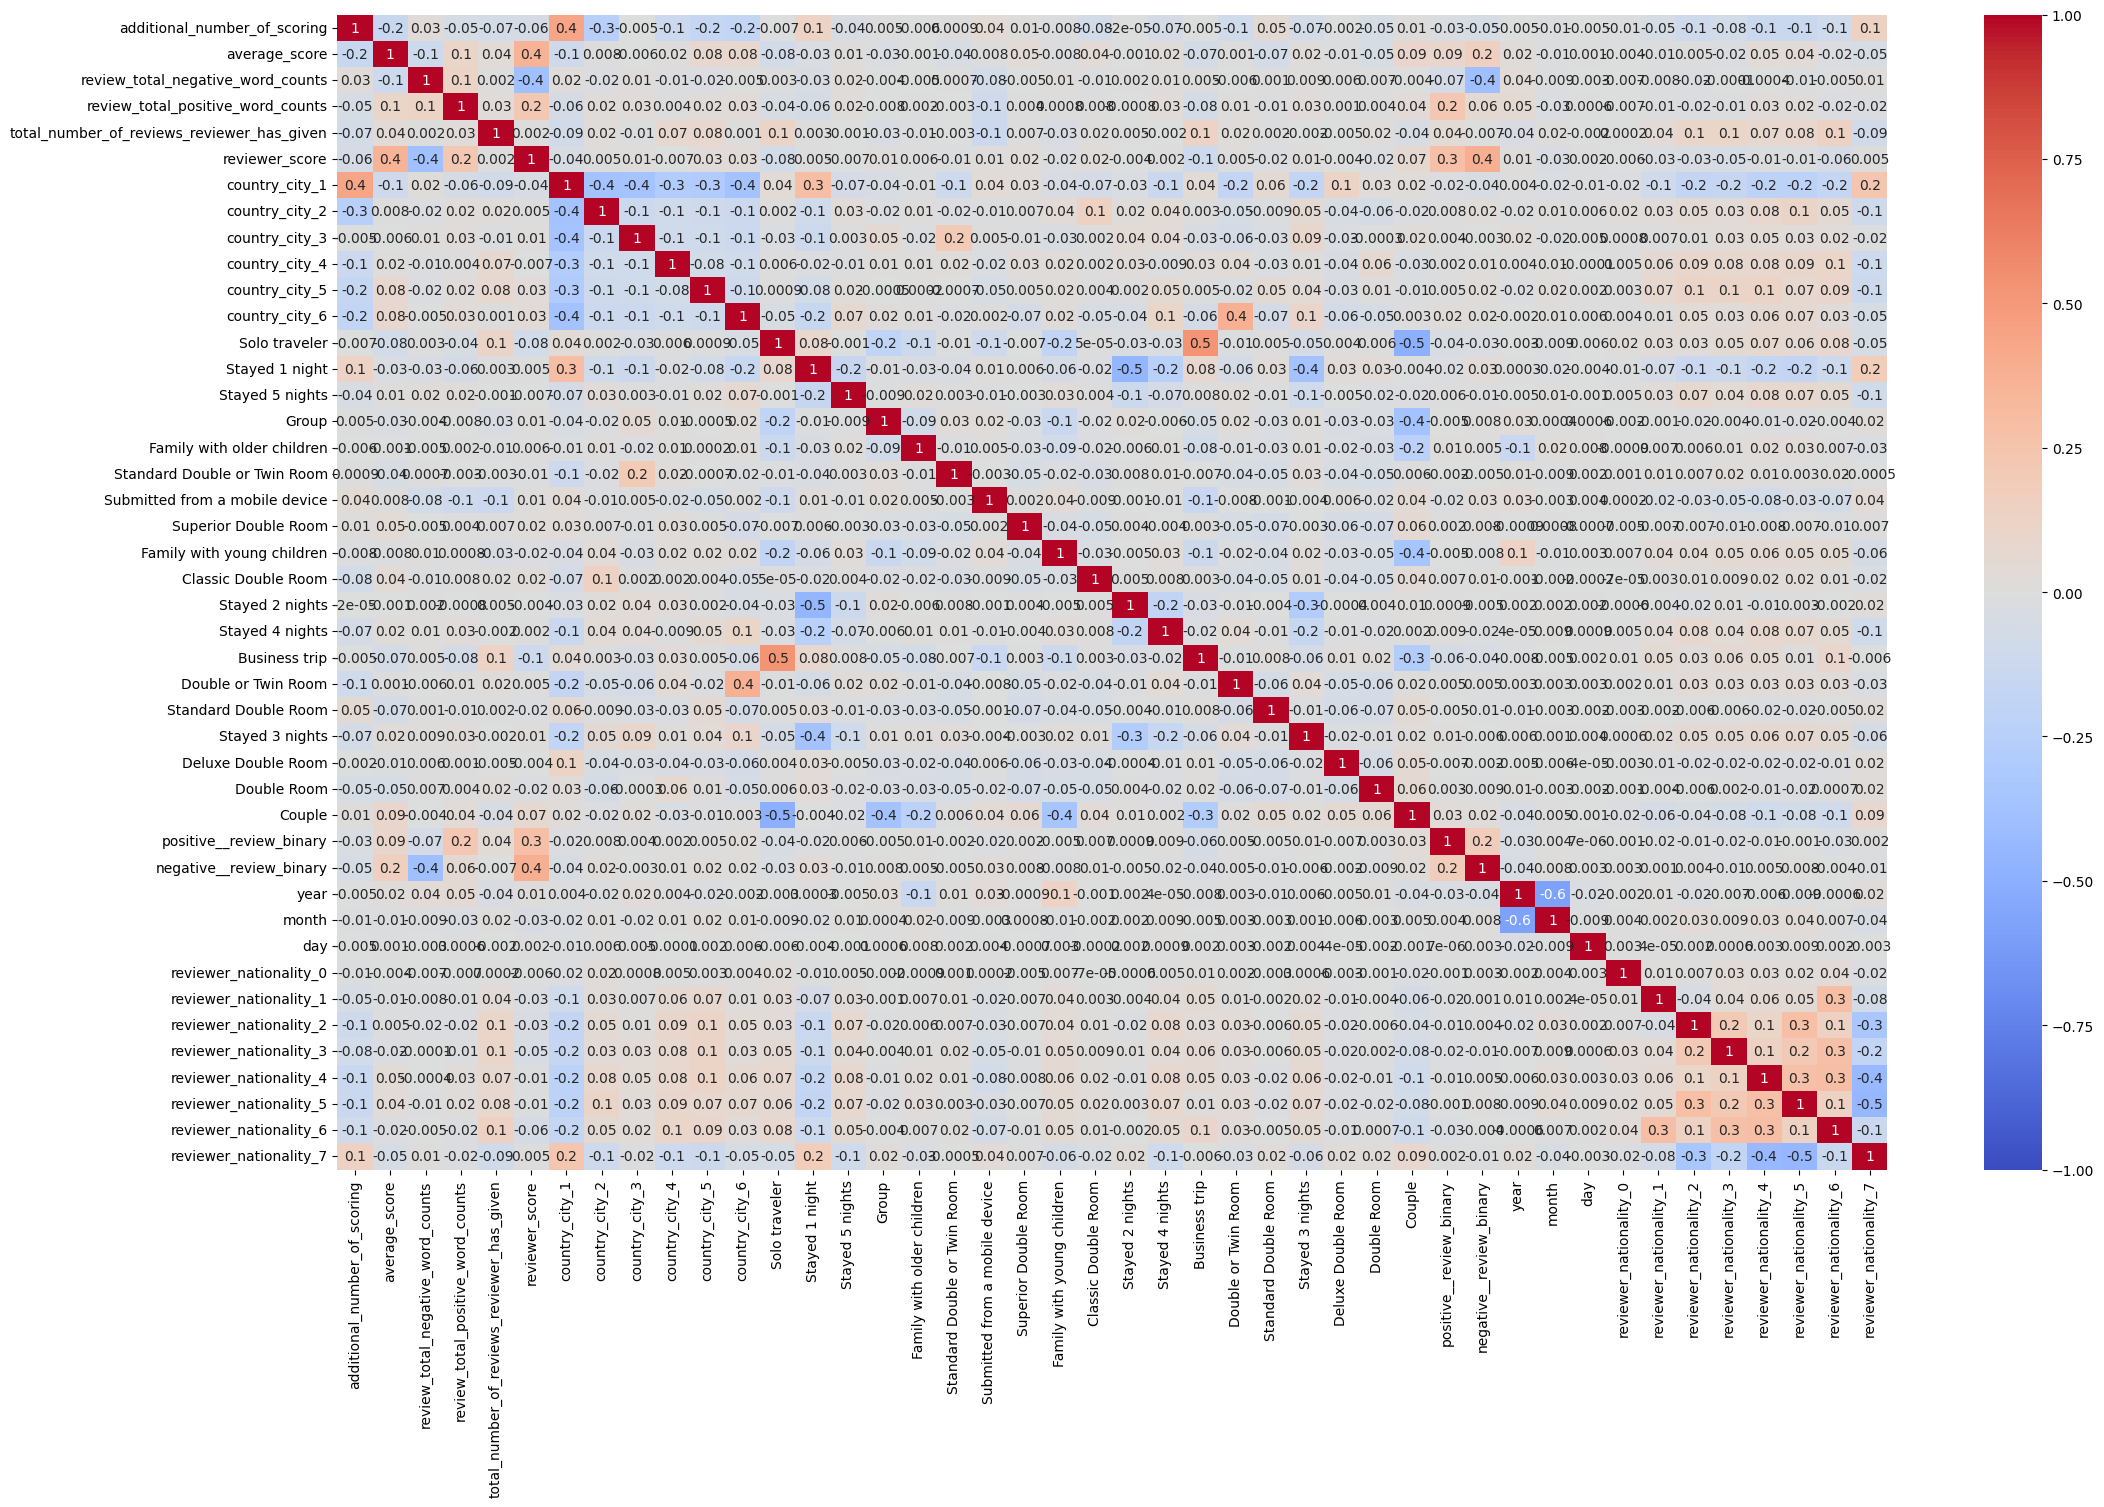

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(data.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [139]:
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [140]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = data.drop(['reviewer_score'], axis = 1)  
y = data['reviewer_score'] 

In [141]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [142]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [143]:
X.shape, X_train.shape, X_test.shape

((386803, 43), (290102, 43), (96701, 43))

In [144]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [145]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.1339164935121541


In [146]:
import plotly.express as px
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
fig= px.bar(feat_importances.sort_values()[:15],
           orientation ='h',
            width = 1000,
               height  = 1000,
               title = 'Самые важные признаки для модели'
           )
fig.show()

In [147]:
# С тэгами признаков до 40 после 29
# MAPE: 0.1375415499120108

# После добавления  признаков  с отзывами признаков до очистки  42 после 31
# MAPE: 0.1357641368122629

# После добавления  признаков  с датой (год, месяц, день) признаков до очистки  44 после 34
# MAPE: 0.13450855620406155

# Добавили: закодировали 'country_city', 'days_since_review' , 'reviewer_nationality'
# признаков до очистки  58 после 49
# MAPE: 0.133834596694898

# C data.drop(['Business trip'])
#MAPE: 0.13402694261522136

#C data.drop(['Leisure trip'])
#MAPE: 0.13398160188995797
print(0.133834596694898 - 0.13398160188995797)

-0.00014700519505997378
